In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
current_directory = os.getcwd()
files = os.listdir(current_directory)
for file in files:
    print(file)


.DS_Store
Report1_apothuri.docx
Report1_apothuri.pdf
Internship_Project_Proposal_Akhilesh.pdf
.ipynb_checkpoints
EDA_Draft 1.ipynb
Internship_Project_Proposal_Akhilesh.docx
FirstTrimesterCCData.csv


In [3]:
raw_df = pd.read_csv("FirstTrimesterCCData.csv")

In [4]:
raw_df.head()

,#,Name,Play Number,QB Comment,Series,Field Position,Down,Distance,Gain,OFF Group,...,pff_QBSCRAMBLE,pff_RBALIGNMENT,pff_RBDEPTH,pff_RBDIRECTION,pff_RBSINBACKFIELD,pff_RUNCONCEPTPRIMARY,pff_RUNCONCEPTSECONDARY,pff_SACK,pff_TEALIGNMENT,pff_PLAYCLOCK
0,71.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 001",1.0,NaN,1.0,-25.0,0.0,10.0,4.0,NaN,...,NaN,HB-L,HB-L (-5),R,1; NCCR 13 (HB-L),COUNTER,QB RUNS,NaN,L,11.0
1,72.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 002",2.0,NaN,1.0,-29.0,2.0,6.0,6.0,NaN,...,NaN,HB,HB (-7),L,1; NCCR 01 (HB),COUNTER,CROSS LEAD,NaN,L;R;R;R,4.0
2,73.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 003",3.0,NaN,1.0,-35.0,1.0,10.0,9.0,NaN,...,NaN,HB-R; FB-L,HB-R (-5); FB-L (-4),L,2; NCCR 00 (HB-R); NCCR 35 (FB-L),POWER,INVERTED;READ OPTION,NaN,L,1.0
3,74.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 004",4.0,NaN,1.0,-44.0,2.0,1.0,8.0,NaN,...,NaN,HB-R,HB-R (-6),R,1; NCCR 00 (HB-R),MAN,LEAD;QB RUNS,NaN,R;R,7.0
4,75.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 005",5.0,NaN,1.0,48.0,1.0,10.0,48.0,NaN,...,NaN,HB-R,HB-R (-5),NaN,1; NCCR 00 (HB-R),NaN,NaN,NaN,L,1.0


In [5]:
raw_df['QB Comment'].unique()

array([nan, '#35 BLOCK', '#86 HARD RUN', 'HELL YEAH', '#0 HARD RUN',
       '#19 BLOCK', '#52 MA. LOAD = SLIDE RT. QB PRESSURE',
       '#76 BAD SET = QB PRESSURE',
       '#76 PENALTY. TAKES AWAY 3RD DOWN CONVERSION'], dtype=object)

In [6]:
raw_df.columns

Index(['#', 'Name', 'Play Number', 'QB Comment', 'Series', 'Field Position',
       'Down', 'Distance', 'Gain', 'OFF Group', 'Personnel', 'The_Play',
       'Backfield', 'FIB', 'Formation', 'Form Adj Y', 'Form Adj WR',
       'Form Adj Bunch Stick', 'Empty', 'Motion', 'Motion 2', 'Motion 3',
       'Protection', 'Play', 'Tempo', 'Run Concept', 'Pass Concept',
       'Pass Concept 1', 'Pass Concept 2', 'Screen Concept', 'RPO1', 'ADDON 1',
       'R/P', 'Pass Result', 'MOE', 'QB#', 'J#', 'EFF', 'gamedate',
       'pff_GAMEDATE', 'pff_WEEK', 'pff_QUARTER', 'pff_DOWN', 'pff_CLOCK',
       'pff_2MINUTE', 'pff_DRIVESTARTEVENT', 'pff_DRIVEENDEVENT',
       'pff_DRIVESTARTFIELDPOSITION', 'pff_DRIVEENDFIELDPOSITION',
       'pff_FIELDPOSITION', 'pff_DRIVEENDPLAYNUMBER', 'pff_DRIVE',
       'pff_DRIVEPLAY', 'pff_GAINLOSS', 'pff_GAINLOSSNET', 'pff_DISTANCE',
       'pff_FIRST_DOWN_GAINED', 'pff_RUNPASS', 'pff_RUNPASSOPTION',
       'pff_PASSRESULT', 'pff_QB', 'pff_BALLCARRIER', 'pff_PENALTYYARDS'

In [7]:
display(raw_df)

,#,Name,Play Number,QB Comment,Series,Field Position,Down,Distance,Gain,OFF Group,...,pff_QBSCRAMBLE,pff_RBALIGNMENT,pff_RBDEPTH,pff_RBDIRECTION,pff_RBSINBACKFIELD,pff_RUNCONCEPTPRIMARY,pff_RUNCONCEPTSECONDARY,pff_SACK,pff_TEALIGNMENT,pff_PLAYCLOCK
0,71.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 001",1.0,NaN,1.0,-25.0,0.0,10.0,4.0,NaN,...,NaN,HB-L,HB-L (-5),R,1; NCCR 13 (HB-L),COUNTER,QB RUNS,NaN,L,11.0
1,72.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 002",2.0,NaN,1.0,-29.0,2.0,6.0,6.0,NaN,...,NaN,HB,HB (-7),L,1; NCCR 01 (HB),COUNTER,CROSS LEAD,NaN,L;R;R;R,4.0
2,73.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 003",3.0,NaN,1.0,-35.0,1.0,10.0,9.0,NaN,...,NaN,HB-R; FB-L,HB-R (-5); FB-L (-4),L,2; NCCR 00 (HB-R); NCCR 35 (FB-L),POWER,INVERTED;READ OPTION,NaN,L,1.0
3,74.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 004",4.0,NaN,1.0,-44.0,2.0,1.0,8.0,NaN,...,NaN,HB-R,HB-R (-6),R,1; NCCR 00 (HB-R),MAN,LEAD;QB RUNS,NaN,R;R,7.0
4,75.0,"01 NCCR OFF vs. MDUN (09/09/23), Play 005",5.0,NaN,1.0,48.0,1.0,10.0,48.0,NaN,...,NaN,HB-R,HB-R (-5),NaN,1; NCCR 00 (HB-R),NaN,NaN,NaN,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 056",56.0,NaN,11.0,35.0,1.0,10.0,0.0,NaN,...,NaN,HB-L,HB-L (-6),L,1; NCCR 13 (HB-L),NaN,NaN,NaN,R,24.0
256,257.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 057",57.0,NaN,11.0,35.0,2.0,10.0,0.0,NaN,...,NaN,HB-R,HB-R (-5),R,1; NCCR 21 (HB-R),NaN,NaN,NaN,L,4.0
257,258.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 058",58.0,NaN,11.0,35.0,3.0,10.0,0.0,NaN,...,NaN,HB-R,HB-R (-5),L,1; NCCR 13 (HB-R),POWER,NaN,NaN,R,4.0
258,259.0,"04 NCCR OFF vs. FLUN (09/23/23), Play 059",59.0,NaN,11.0,35.0,4.0,10.0,0.0,NaN,...,NaN,HB-L,HB-L (-5),L,1; NCCR 13 (HB-L),NaN,NaN,NaN,R,4.0


In [8]:
raw_df.shape

(260, 89)

In [9]:
raw_df.isna().sum()

#                            1
Name                         1
Play Number                  1
QB Comment                 250
Series                       5
                          ... 
pff_RUNCONCEPTPRIMARY      121
pff_RUNCONCEPTSECONDARY    179
pff_SACK                   248
pff_TEALIGNMENT             76
pff_PLAYCLOCK               49
Length: 89, dtype: int64

In [10]:
raw_df.describe()

,#,Play Number,Series,Field Position,Down,Distance,Gain,OFF Group,QB#,J#,...,pff_RUNPASSOPTION,pff_PENALTYYARDS,pff_SCORE,pff_SCOREDIFFERENTIAL,pff_OFFPERSONNELBASIC,pff_TIMETOTHROW,pff_YARDSAFTERCATCH,pff_YARDSAFTERCONTACT,Unnamed: 37,pff_PLAYCLOCK
count,259.000000,259.000000,255.000000,259.000000,259.00000,259.000000,237.000000,0.0,257.000000,245.000000,...,216.000000,8.000000,216.000000,216.000000,216.000000,110.000000,59.000000,173.000000,0.0,211.000000
mean,130.000000,33.088803,6.478431,-9.548263,1.80695,8.826255,5.375527,NaN,5.961089,14.853061,...,0.129630,-2.250000,12.129630,-3.370370,11.689815,2.906364,5.762712,2.421965,NaN,12.563981
std,74.911058,19.091676,3.159557,32.224031,1.11777,4.236781,9.764077,NaN,3.149660,20.362766,...,0.336676,8.224528,10.322333,12.598702,0.618391,1.214989,6.744957,4.434403,NaN,7.332863
min,1.000000,1.000000,1.000000,-49.000000,0.00000,1.000000,-13.000000,NaN,4.000000,0.000000,...,0.000000,-10.000000,0.000000,-24.000000,11.000000,0.600000,0.000000,-1.000000,NaN,0.000000
25%,65.500000,17.000000,4.000000,-38.000000,1.00000,6.500000,0.000000,NaN,4.000000,4.000000,...,0.000000,-8.500000,0.000000,-13.250000,11.000000,2.100000,1.000000,0.000000,NaN,6.500000
50%,130.000000,33.000000,6.000000,-25.000000,2.00000,10.000000,3.000000,NaN,4.000000,11.000000,...,0.000000,-2.500000,13.500000,-7.000000,12.000000,2.600000,4.000000,2.000000,NaN,12.000000
75%,194.500000,49.000000,9.000000,19.500000,3.00000,10.000000,8.000000,NaN,11.000000,18.000000,...,0.000000,0.000000,19.000000,11.000000,12.000000,3.575000,7.500000,3.000000,NaN,18.000000
max,259.000000,70.000000,12.000000,50.000000,5.00000,23.000000,58.000000,NaN,11.000000,86.000000,...,1.000000,15.000000,38.000000,21.000000,14.000000,7.400000,38.000000,52.000000,NaN,34.000000


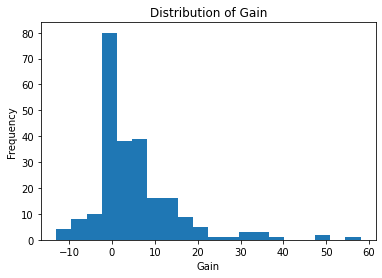

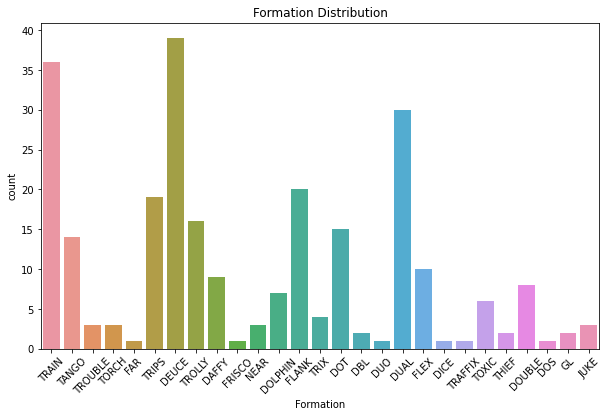

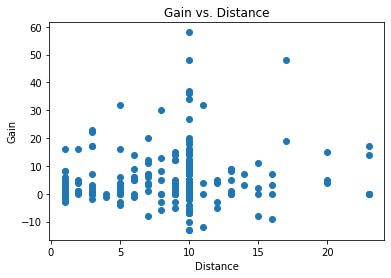

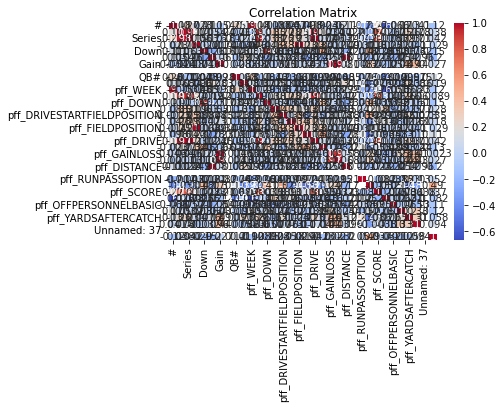

In [16]:
# Histogram of 'Gain'
plt.hist(raw_df['Gain'], bins=20)
plt.xlabel('Gain')
plt.ylabel('Frequency')
plt.title('Distribution of Gain')
plt.show()

# 3. Data Visualization
# Bar chart for 'Formation'
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_df, x='Formation')
plt.xticks(rotation=45)
plt.title('Formation Distribution')
plt.show()

# Scatter plot to explore relationships
plt.scatter(raw_df['Distance'], raw_df['Gain'])
plt.xlabel('Distance')
plt.ylabel('Gain')
plt.title('Gain vs. Distance')
plt.show()

# 5. Correlation Analysis
correlation_matrix = raw_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


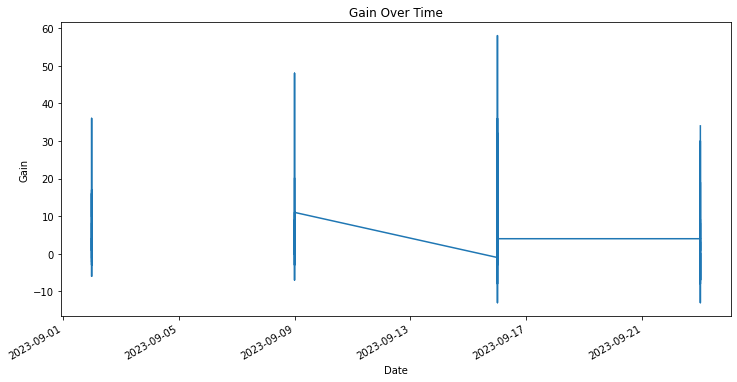

In [18]:
# Convert 'gamedate' to datetime
raw_df['gamedate'] = pd.to_datetime(raw_df['gamedate'])

# Time series plot for 'Gain' over time
plt.figure(figsize=(12, 6))
raw_df.set_index('gamedate')['Gain'].plot()
plt.xlabel('Date')
plt.ylabel('Gain')
plt.title('Gain Over Time')
plt.show()


In [20]:
raw_df[['Play','gamedate','Gain']]

,Play,gamedate,Gain
0,AKRON EDGE,2023-09-09,4.0
1,S. CINCY EDGE Z-BOSS,2023-09-09,6.0
2,S. PITT COVER Z-CRACK,2023-09-09,9.0
3,BEETLE FOLLOW,2023-09-09,8.0
4,S. GOLFER SAIL,2023-09-09,48.0
...,...,...,...
255,JILL PIN BOOT,2023-09-23,0.0
256,SPRINT,2023-09-23,0.0
257,S. CALI RUBY,2023-09-23,0.0
258,JILL H-DRIVE DANCER,2023-09-23,0.0


In [21]:
raw_df.gamedate.unique()

array(['2023-09-09T00:00:00.000000000', '2023-09-02T00:00:00.000000000',
       '2023-09-16T00:00:00.000000000', '2023-09-23T00:00:00.000000000',
                                 'NaT'], dtype='datetime64[ns]')